Week 4 · Day 1 — K-Means Clustering
Why this matters (2–3 lines)

Clustering groups similar items without labels, unlocking structure in raw data (segments, topics, behaviors). K-Means is the workhorse: fast, simple, and a baseline you’ll compare others against.

Theory Essentials (≤6 bullets)

Objective: assign each sample to one of K clusters by minimizing within-cluster sum of squares (inertia).

Update rule: assign → recompute centroids → repeat until convergence (Lloyd’s algorithm).

Sensitive to scale and assumes roughly spherical clusters of similar size.

Initialization matters; use k-means++ (init="k-means++") and multiple restarts (n_init).

Model selection for K: elbow (inertia) and silhouette (−1…1). When labels exist, report ARI/NMI.

Centroids live in feature space; interpret by inverse scaling for real units.

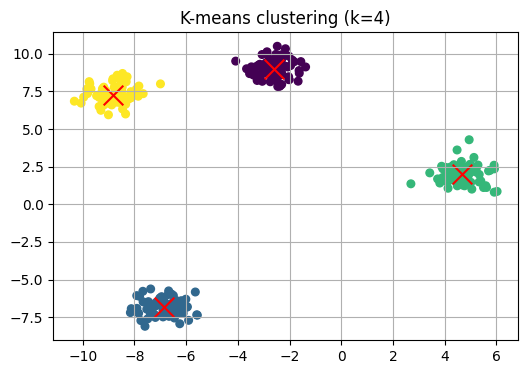

Inertia: 203.8907468405834
Silhouette score: 0.8756469540734731


In [3]:
# Setup
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Plot clusters
plt.scatter(X[:,0], X[:,1], c=labels, s=30, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c="red", marker="x", s=200)
plt.title("K-means clustering (k=4)")
plt.show()

# Evaluation
print("Inertia:", kmeans.inertia_)
print("Silhouette score:", silhouette_score(X, labels))


📌 Relationship between make_blobs, KMeans, and the Silhouette score

make_blobs
Creates a synthetic dataset for clustering.

Generates a chosen number of points (n_samples).

Groups them around a chosen number of hidden centers (centers).

Adds some spread (cluster_std) to scatter the points.
→ Example: n_samples=300, centers=4 makes 300 points around 4 “true” centers.

KMeans
A clustering algorithm that tries to discover those centers:

Starts with random guesses for k cluster centers.

Assigns each point to its closest guessed center.

Moves each center to the average position of its assigned points.

Repeats until the centers stabilize.
→ The final red crosses are KMeans’ estimated centers of the blobs.

Silhouette score
Evaluates the quality of clustering on a scale from -1 to 1:

Close to 1 → clusters are well separated and points are close to their own center.

Around 0 → clusters overlap; assignments are fuzzy.

Negative → many points are likely assigned to the wrong cluster.

👉 Important: The silhouette score depends on both

The dataset structure (from make_blobs).

How well KMeans matches that structure.

So:

If make_blobs generates clean, separated blobs → KMeans finds good centers → silhouette is high.

If make_blobs generates overlapping blobs → even the best clustering will give a lower silhouette.

1. What does inertia mean?

Inertia = total squared distance of each point to its cluster’s centroid.

Think of it like “how tightly packed the clusters are.”

Lower inertia = points are closer to their assigned centers → tighter clusters.

⚠️ But inertia always decreases when k increases (more clusters = easier to fit), so by itself it doesn’t tell you the “best” k. That’s why we also check silhouette.

Exercises

1) Core (10–15 min)
Task: Change n_clusters to 3 and 5. Plot and compare.

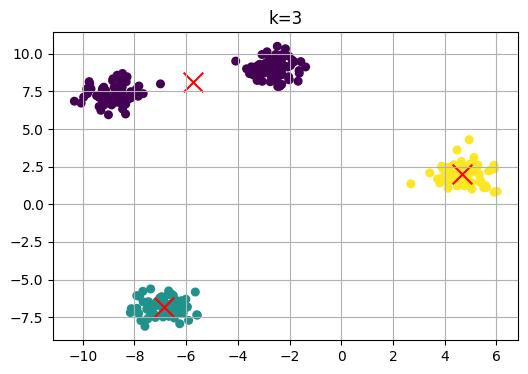

Inertia: 203.8907468405834
Silhouette score: 0.7992801073745723


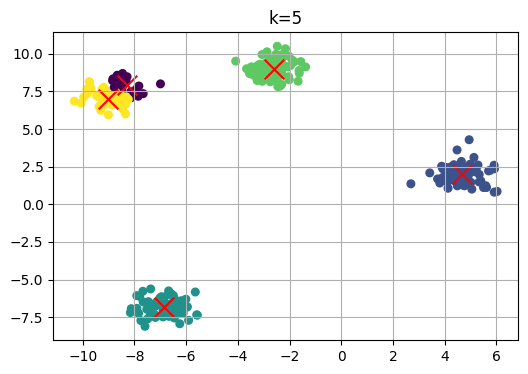

Inertia: 203.8907468405834
Silhouette score: 0.7552173381897673


In [5]:
for k in [3,5]:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=30)
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c="red", marker="x", s=200)
    plt.title(f"k={k}")
    plt.show()

    print("Inertia:", kmeans.inertia_)
    print("Silhouette score:", silhouette_score(X, labels))


2) Practice (10–15 min)
Task: Compute silhouette scores for k=2…8 and plot them.

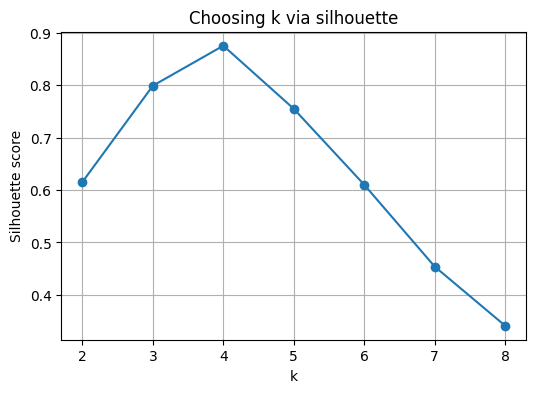

In [6]:
scores = []
for k in range(2,9):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.plot(range(2,9), scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Choosing k via silhouette")
plt.show()

3) Stretch (optional, 10–15 min)
Task: Run KMeans with very high n_clusters (like 10). What happens?

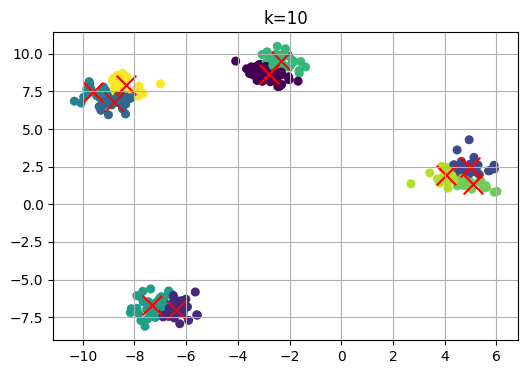

Inertia: 203.8907468405834
Silhouette score: 0.3591860547574684


In [8]:

km = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = km.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=30)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c="red", marker="x", s=200)
plt.title(f"k={10}")
plt.show()

print("Inertia:", kmeans.inertia_)
print("Silhouette score:", silhouette_score(X, labels))

Mini-Challenge (≤40 min)

Task: Apply KMeans on the Iris dataset (use only numeric features). Try k=2,3,4.
Acceptance Criteria:

Load Iris via sklearn.datasets.load_iris.

Compare inertia + silhouette scores.

Print confusion matrix between cluster labels and true species.

k=2 | Inertia=152.3 | Silhouette=0.681
k=3 | Inertia=78.9 | Silhouette=0.553
k=4 | Inertia=57.2 | Silhouette=0.498

--- Confusion matrix (raw cluster IDs vs species) ---
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]

--- Confusion matrix (after simple majority mapping) ---
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


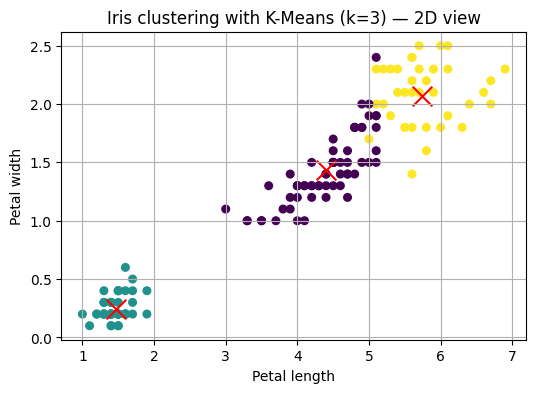


Summary:
   k     inertia  silhouette
0  2  152.347952    0.681046
1  3   78.851441    0.552819
2  4   57.228473    0.498051


In [9]:
from sklearn.datasets import load_iris

# Setup
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix

# 1) Load Iris (all 4 numeric features)
iris = load_iris()
X = iris.data                              # shape (150, 4)
y_true = iris.target                       # 0=setosa, 1=versicolor, 2=virginica
target_names = iris.target_names

# 2) Try k = 2,3,4 — report inertia and silhouette
results = []
for k in [2,3,4]:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X)
    inertia = km.inertia_
    sil = silhouette_score(X, labels)
    results.append((k, inertia, sil))
    print(f"k={k} | Inertia={inertia:.1f} | Silhouette={sil:.3f}")

# 3) Choose k=3 for inspection (Iris has 3 species)
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

print("\n--- Confusion matrix (raw cluster IDs vs species) ---")
cm_raw = confusion_matrix(y_true, labels)
print(cm_raw)

# 4) Align cluster IDs to true labels (for readability only)
# Map each cluster id -> the most frequent true class within it
mapping = {}
for cluster_id in range(k):
    mask = labels == cluster_id
    if mask.sum() == 0:
        mapping[cluster_id] = cluster_id  # fallback
    else:
        majority_true = np.bincount(y_true[mask]).argmax()
        mapping[cluster_id] = majority_true

labels_aligned = np.vectorize(mapping.get)(labels)
print("\n--- Confusion matrix (after simple majority mapping) ---")
cm_aligned = confusion_matrix(y_true, labels_aligned)
print(cm_aligned)

# 5) Plot a 2-D slice (petal length vs petal width) colored by KMeans labels
#    KMeans used all 4 dims; for plotting we take just dims [2]=petal length, [3]=petal width.
x_i, y_i = 2, 3
plt.figure()
plt.scatter(X[:, x_i], X[:, y_i], c=labels, s=30, cmap="viridis")
# Project centroids to the same 2 dims
centroids_2d = kmeans.cluster_centers_[:, [x_i, y_i]]
plt.scatter(centroids_2d[:,0], centroids_2d[:,1], c="red", marker="x", s=200)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Iris clustering with K-Means (k=3) — 2D view")
plt.show()

# 6) (Optional) Show results table
df_results = pd.DataFrame(results, columns=["k", "inertia", "silhouette"])
print("\nSummary:")
print(df_results)

Notes / Key Takeaways

KMeans partitions data into k groups by minimizing distances.

Works best when clusters are spherical and balanced.

Need to pick k (try elbow or silhouette method).

Sensitive to initial seeds (use multiple n_init).

Useful for customer segmentation, anomaly detection, image compression

Reflection

How does clustering differ from classification?

Why is it harder to evaluate unsupervised methods?

Why is evaluation harder in clustering (vs classification)?

In classification, we have true labels, so metrics (accuracy, F1, etc.) are straightforward.

In clustering, there are no labels (unsupervised), so we rely on indirect scores (inertia, silhouette) that don’t guarantee “ground truth” correctness.

Even when labels exist (like Iris), cluster IDs are arbitrary and need mapping before comparison.

Why is supervision harder in clustering (vs classification)?

Classification is supervised: the model learns directly from labeled examples.

Clustering has no labels to guide learning — the algorithm must discover structure on its own.

This makes it harder to “teach” the model what the right groups should be.